In [3]:
"""
Python可视化24|seaborn绘制多变量分布图（jointplot|JointGrid）
原创 pythonic生物人 pythonic生物人 2020-08-20 22:50

本文介绍两个变量之间的分布图（Draw a plot of two variables with bivariate and univariate graphs.）。

目录
1、绘图数据准备
2、seaborn.jointplot
 图形基本设置
 修改中部图
 修改边际图
 kind参数设置
 给中部散点图加上核密度图 
3、seaborn.JointGrid
 sns.JointGrid基础使用 
 分别绘制中心及边际图
 分别个性化绘制边际图 
 分别绘制x轴方向及y轴方向边际图 
"""
import warnings
warnings.filterwarnings("ignore")

In [4]:
"""
1、绘图数据准备
还是鸢尾花iris数据集：鸢尾花iris数据集介绍
"""
#导入本帖要用到的库，声明如下：
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import palettable
from pandas import Series,DataFrame
from sklearn import datasets
import seaborn as sns
import palettable
#导入鸢尾花iris数据集
#该方法更有助于理解数据集
iris=datasets.load_iris()
x, y =iris.data,iris.target
y_1 = np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris = pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])
 
#astype修改pd_iris中数据类型object为float64
pd_iris['sepal length(cm)']=pd_iris['sepal length(cm)'].astype('float64')
pd_iris['sepal width(cm)']=pd_iris['sepal width(cm)'].astype('float64')
pd_iris['petal length(cm)']=pd_iris['petal length(cm)'].astype('float64')
pd_iris['petal width(cm)']=pd_iris['petal width(cm)'].astype('float64')
pd_iris.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


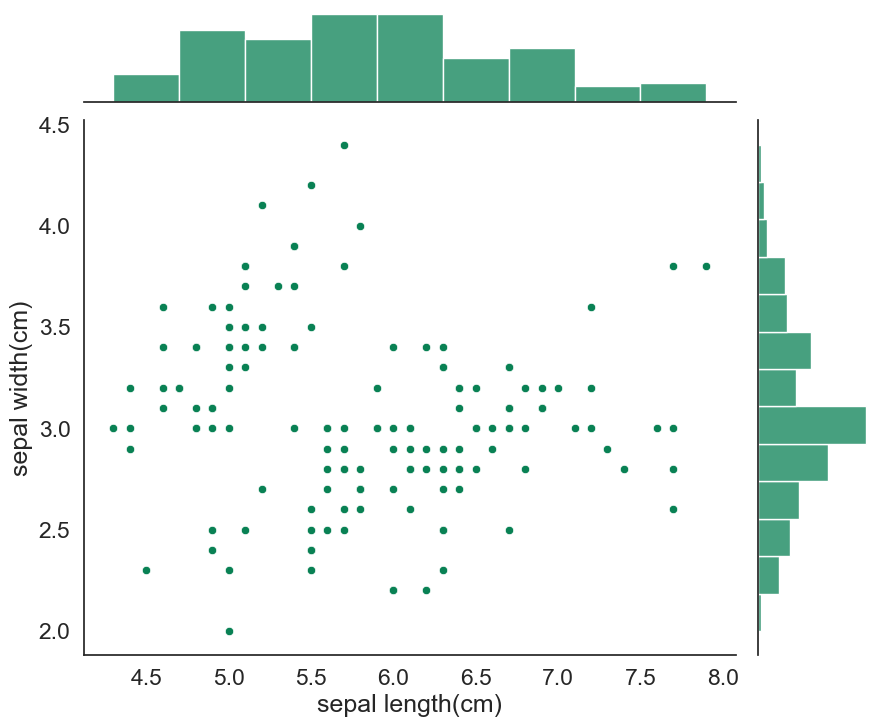

In [5]:
"""
2、seaborn.jointplot
seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
同时绘制两个变量之间的分布图（Draw a plot of two variables with bivariate and univariate graphs.）
该图由三部分组成：

中间两变量关系图
上部x轴变量分布边际图
右侧y轴变量分布边际图

图形基本设置
"""
sns.set(style="white",font_scale=1.5)#设置主题，文本大小
g = sns.jointplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,#输入两个绘图变量
                 color='#098154',#修改颜色
                 )
g.fig.set_size_inches(10,8)#设置图尺寸

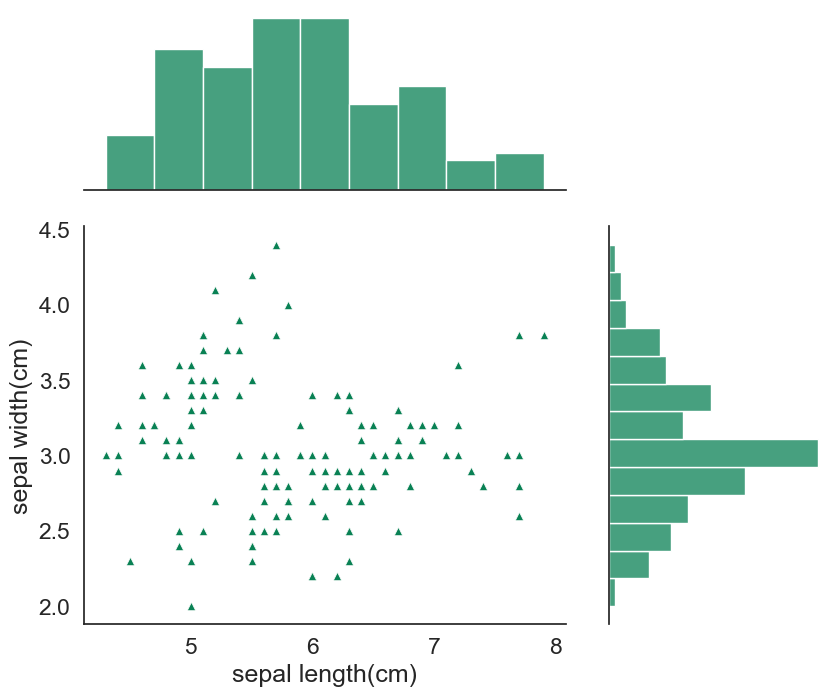

In [6]:
"""
修改中部图
"""
sns.set(style="white",font_scale=1.5)
g = sns.jointplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
                  color='#098154',
                  height=5, #中部图高度（中部图为正方形）
                  ratio=2,#中部图与边际图尺寸比
                  marker='^',#修改散点marker
                 )
g.fig.set_size_inches(10,8) 

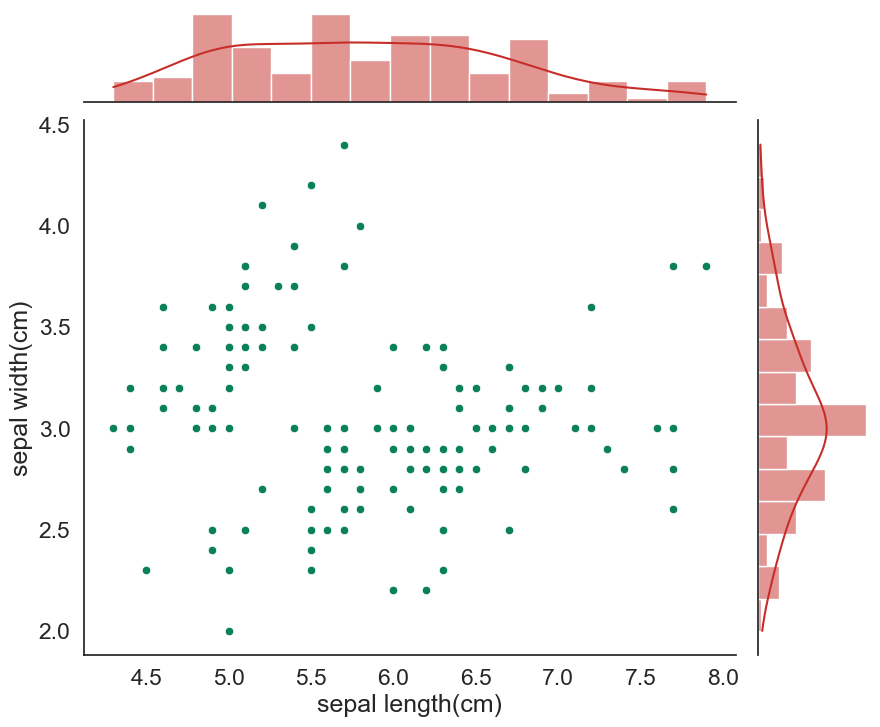

In [7]:
"""
修改边际图
边际图是一个直方图hist，更多详细设置可参考：seaborn直方图hist
"""
sns.set(style="white",font_scale=1.5)
g = sns.jointplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
                  color='#098154',
                  marginal_kws=dict(bins=15, #hist箱子个数
                                    kde=True,#开启核密度图
                                    color='#c72e29',#直方图hist填充色                                    
                                   ),
                 )
g.fig.set_size_inches(10,8)

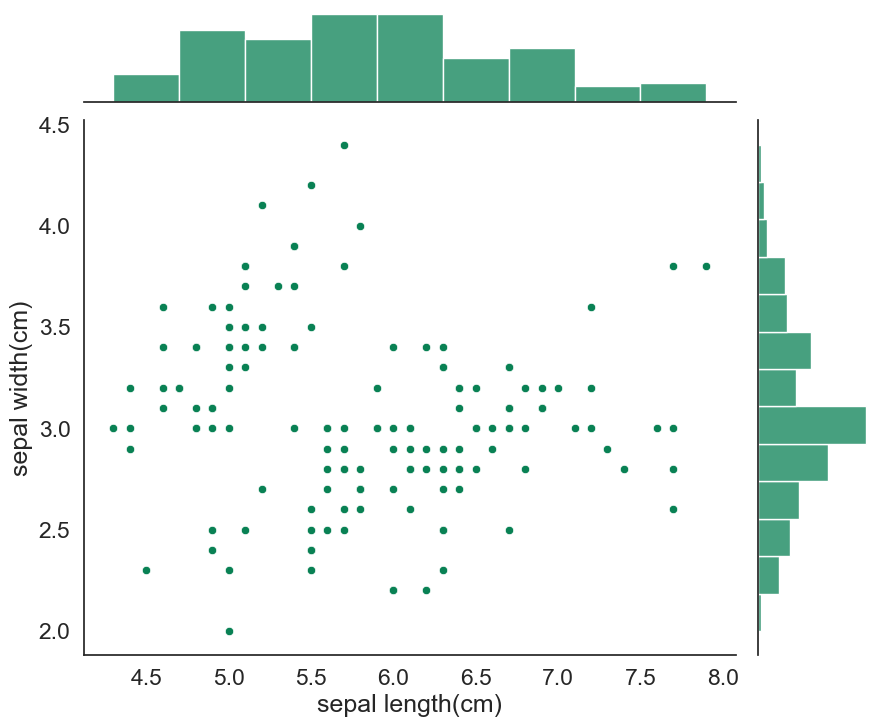

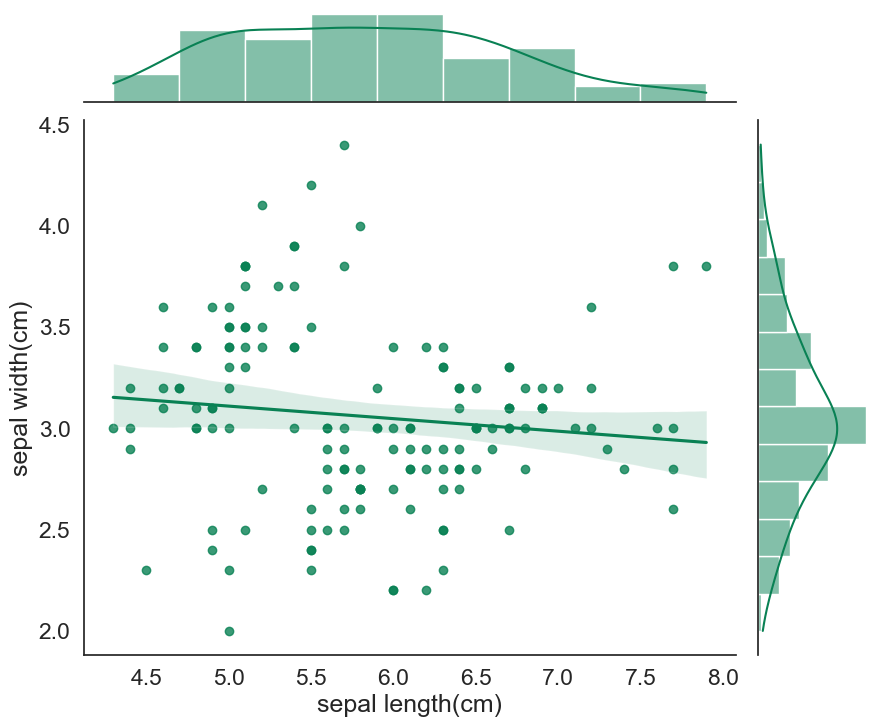

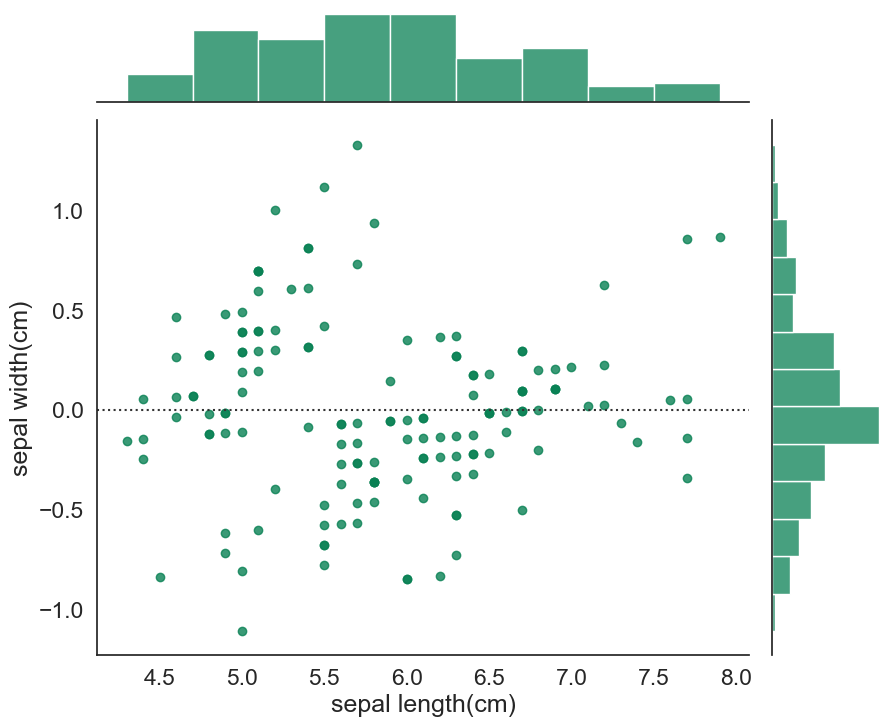

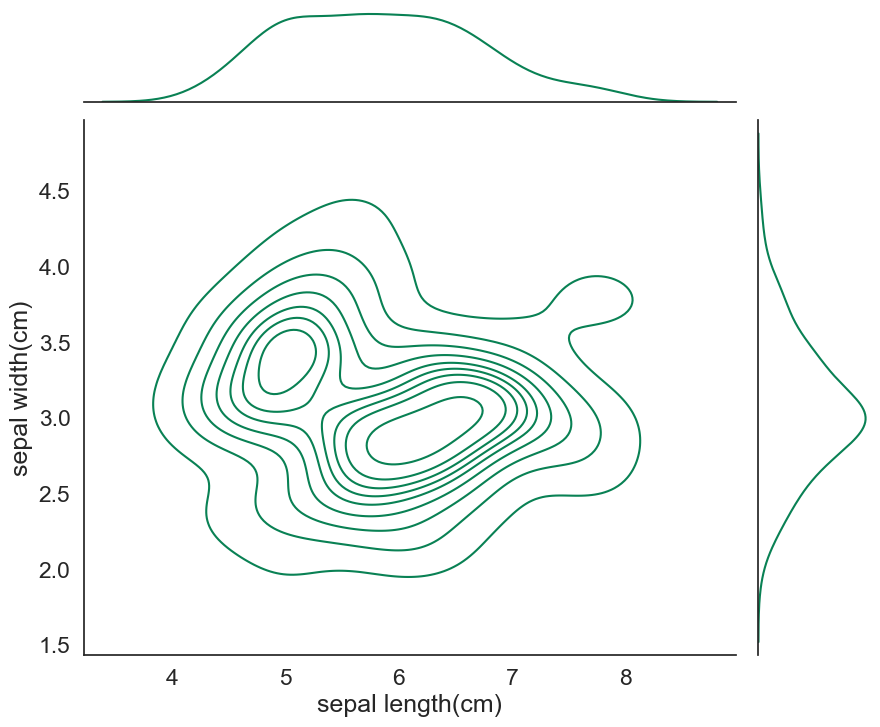

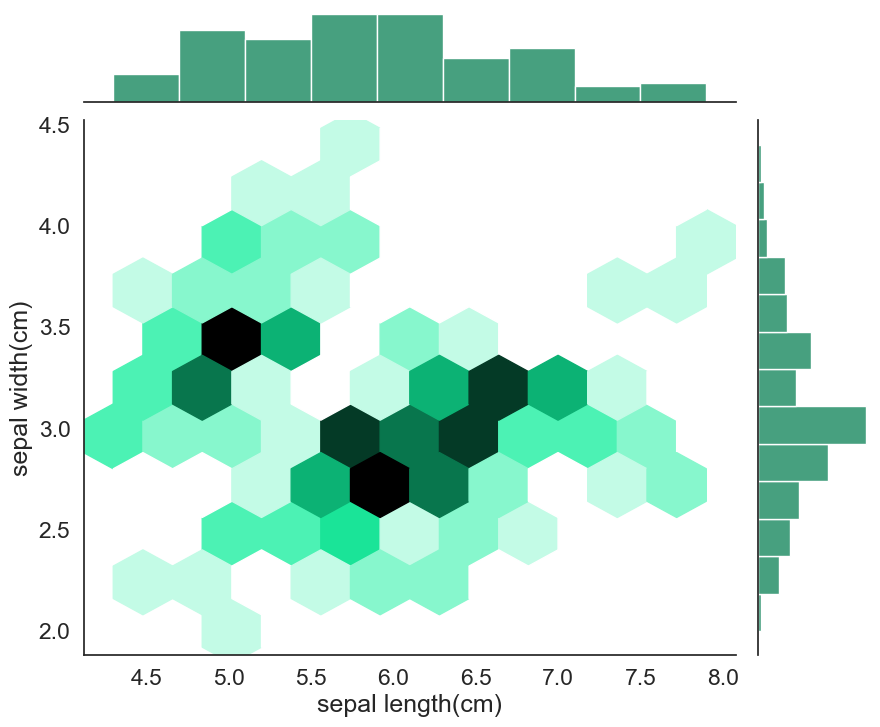

In [8]:
"""
kind参数设置
包含五个选项，即'scatter,reg,resid,kde,hex'，默认为scatter，下面看看各类是什么样子。
"""
for i in list('scatter,reg,resid,kde,hex'.split(',')):
    sns.set(style="white",font_scale=1.5)
    g = sns.jointplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
                      color='#098154',
                      kind=i,#scatter（默认）,可选reg,resid,kde,hex
                     )
    g.fig.set_size_inches(10,8)  

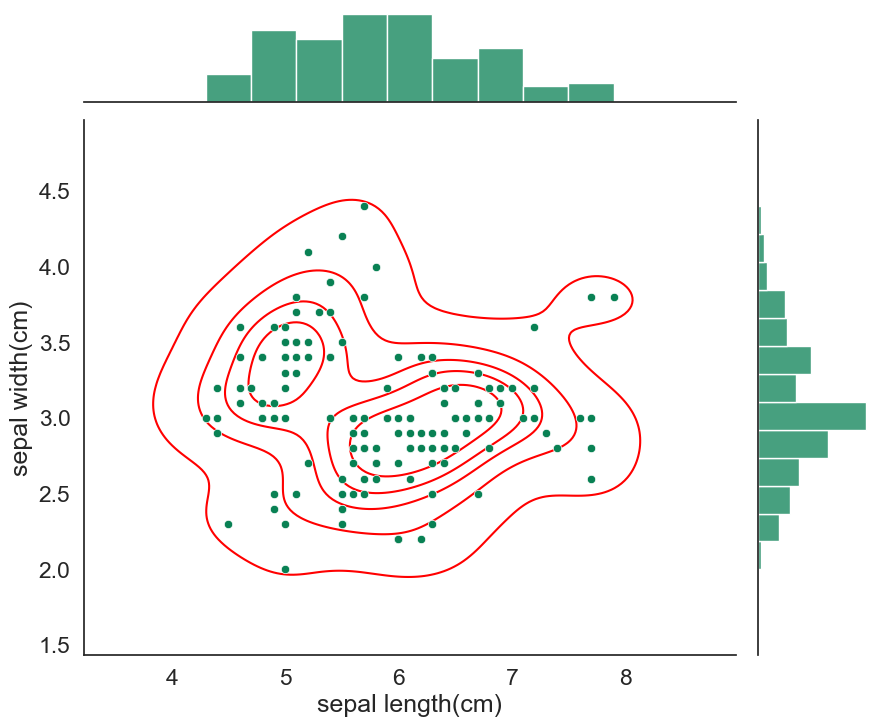

In [9]:
"""
给中部散点图加上核密度图
"""
sns.set(style="white",font_scale=1.5)#设置主题，文本大小
#sns.set_style("white", {"axes.facecolor": "#d5e4eb"})#自定义背景色
g = sns.jointplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,#输入两个绘图变量
                 color='#098154',
                 )
g.fig.set_size_inches(10,8)#设置图尺寸
g.plot_joint(sns.kdeplot, zorder=0, n_levels=6,color='red')

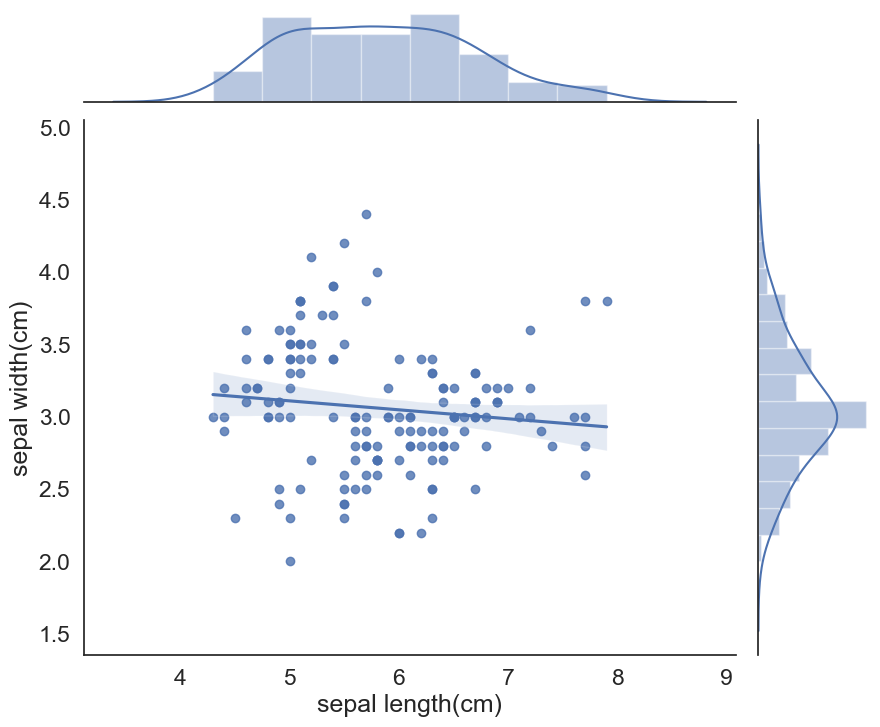

In [19]:
"""
 以上只是基础玩法，高级玩法还得seaborn.jointplot的底层seaborn.JointGrid上场

3、seaborn.JointGrid
class seaborn.JointGrid(x, y, data=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, size=None)
seaborn.JointGrid是seaborn.jointplot的底层，个人理解类似于seaborn的底层是matplotlib一般。

sns.JointGrid基础使用
"""
g = sns.JointGrid(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,#一张画布
                 )
g = g.plot(sns.regplot, sns.distplot)#画布上绘制三张图
g.fig.set_size_inches(10,8)#设置图尺寸

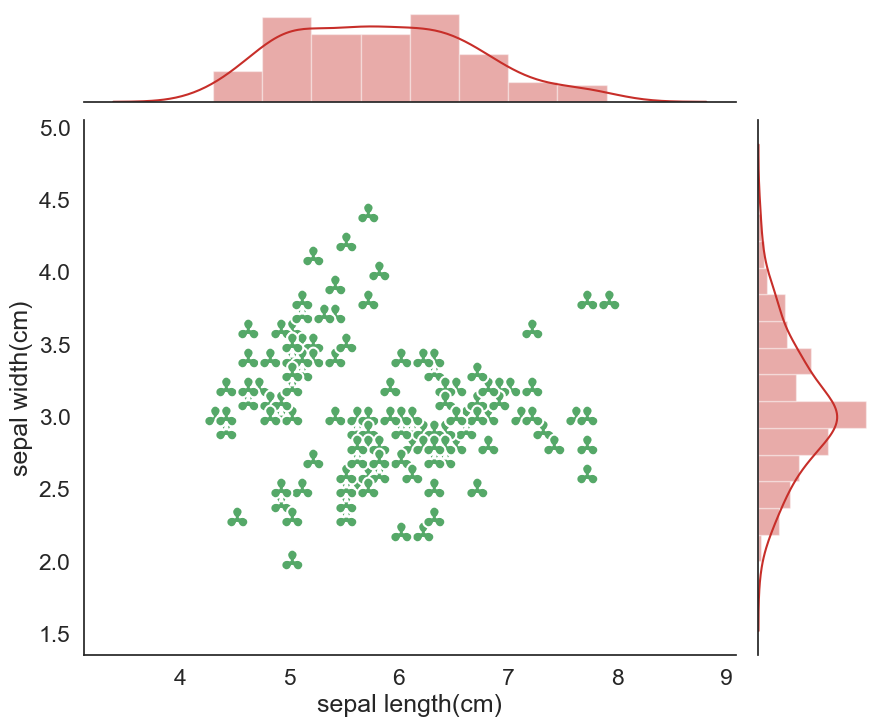

In [17]:
"""
分别绘制中心及边际图
"""
g = sns.JointGrid(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,)
g.fig.set_size_inches(10,8)
g = g.plot_joint(sns.scatterplot, color='g',marker='$\clubsuit$',s=340)#中心绘制散点图
g = g.plot_marginals(sns.distplot, kde=True, color='#c72e29')#边际绘制hist直方图

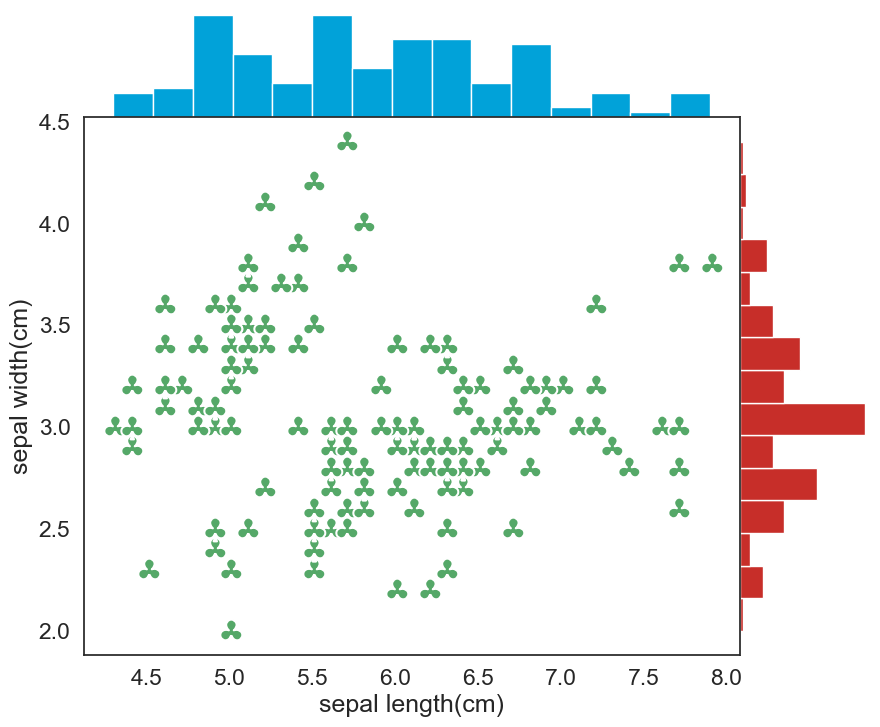

In [16]:
"""
分别个性化绘制边际图
"""
g = sns.JointGrid(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris, space=0)
g.fig.set_size_inches(10,8)
g = g.plot_joint(sns.scatterplot, color='g',marker='$\clubsuit$',s=340)

#x轴方向边际图
g.ax_marg_x.hist(pd_iris['sepal length(cm)'], color='#01a2d9', alpha=1,
                 bins=15,
                 
                )

#y轴方向边际图
g.ax_marg_y.hist(pd_iris['sepal width(cm)'], color='#c72e29', alpha=1,
                    orientation="horizontal",
                   bins=15)
plt.show()

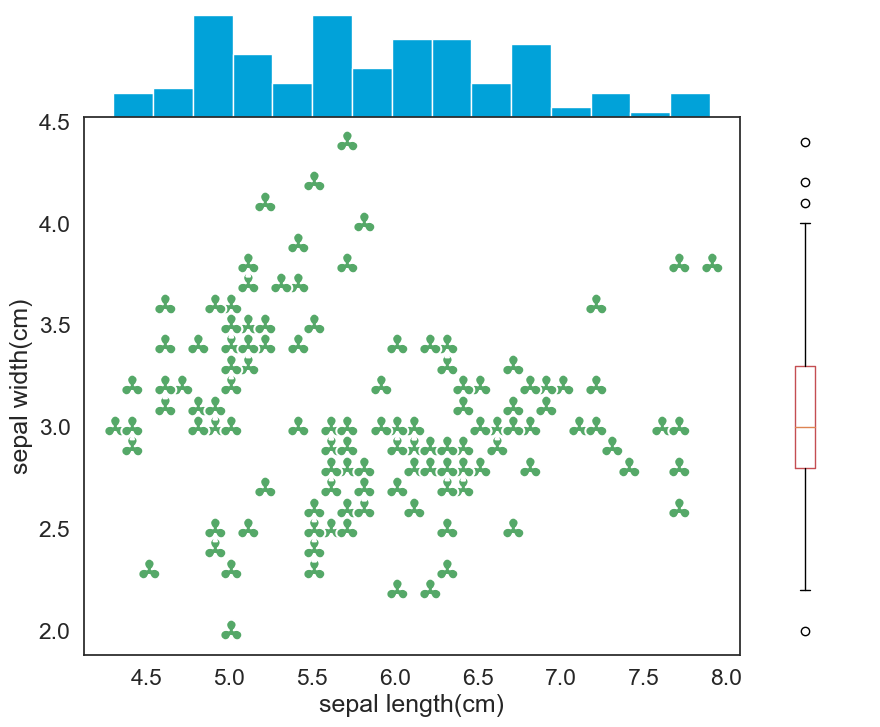

In [20]:
"""
分别绘制x轴方向及y轴方向边际图
"""
#每个边际图是一个matplotlib.axes._subplots.AxesSubplot对象，可自由发挥绘制想要的图
g = sns.JointGrid(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris, space=0)
g.fig.set_size_inches(10,8)
g = g.plot_joint(sns.scatterplot, color='g',marker='$\clubsuit$',s=340)

#x轴方向边际图
g.ax_marg_x.hist(pd_iris['sepal length(cm)'], color='#01a2d9', alpha=1,bins=15)

#y轴方向绘制箱图
g.ax_marg_y.boxplot(pd_iris['sepal width(cm)'],boxprops={'color':'r',})
plt.show()

In [ ]:
参考资料：
http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
http://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid
同系列文章
Python可视化21|Seaborn.catplot(上)-小提琴图等四类图
Python可视化22|Seaborn.catplot(下)-boxenplot|barplot|countplot图
Python可视化23|seaborn.distplot单变量分布图(直方图|核密度图)